# Analyze engagement for different topics and events in comparison to #IchBinHanna

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [75]:
src = '../../data/counts'
dst = '../../plots/frequency_comparison_to_other_events/'
colors = ['#1c9099', 'grey', '#ffc996', '#ff8474', '#9f5f80', '#583d72' ]


## Data wrangling

See ```queries``` for the counts search queries (```_counts.sh```).

In [76]:
# load the counts data
ESC = pd.read_csv(join(src, 'ESC_counts.csv'), parse_dates=['start', 'end'])
ESC = ESC.sort_values(by=['start']).reset_index(drop=True)

euro = pd.read_csv(join(src, 'euro_counts.csv'), parse_dates=['start', 'end'])
euro = euro.sort_values(by=['start']).reset_index(drop=True)

btw = pd.read_csv(join(src, 'bundestagswahl_counts.csv'), parse_dates=['start', 'end'])
btw = btw.sort_values(by=['start']).reset_index(drop=True)

IchBinHanna = pd.read_csv(join(src, 'IchBinHanna_counts.csv'), parse_dates=['start', 'end'])
IchBinHanna = IchBinHanna.sort_values(by=['start']).reset_index(drop=True)

HannaImBundestag = pd.read_csv(join(src, 'HannaImBundestag_counts.csv'), parse_dates=['start', 'end'])
HannaImBundestag = HannaImBundestag.sort_values(by=['start']).reset_index(drop=True)

hanna = IchBinHanna.copy()
hanna['day_count'] = hanna['day_count'] + HannaImBundestag['day_count']

## Comparison of popularity with other events

Compare the #IchBinHanna movement with other recent popular events and related hasthags. We compare to the eurovision song contest (#ESC), the european football championship (#euro2020) and the German elections (#BTW21).

In [77]:
print('total tweets #IchBinHanna & #HannaImBundestag: {}'\
      .format(hanna['day_count'].sum()))

print('total tweets Eurovision 2021 related hashtags: {}'\
      .format(ESC['day_count'].sum()))

print('total tweets EM 2020 related hasthags: {}'\
      .format(euro['day_count'].sum()))

print('total tweets Bundestagswahl 2021 related hasthags: {}'\
      .format(btw['day_count'].sum()))

total tweets #IchBinHanna & #HannaImBundestag: 61392
total tweets Eurovision 2021 related hashtags: 38897
total tweets EM 2020 related hasthags: 267684
total tweets Bundestagswahl 2021 related hasthags: 216798


### Tweet frequencies

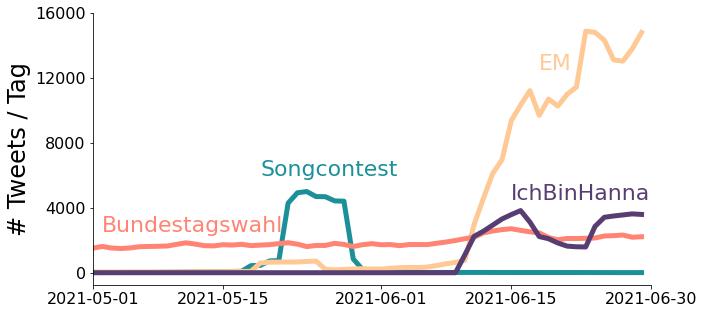

In [153]:
fig, ax = plt.subplots(figsize=(10, 5))

ESC['day_count_avg'] = ESC['day_count'].rolling(7).mean()
euro['day_count_avg'] = euro['day_count'].rolling(7).mean()
hanna['day_count_avg'] = hanna['day_count'].rolling(7).mean()
btw['day_count_avg'] = btw['day_count'].rolling(7).mean()

ax.plot(ESC['start'], ESC['day_count_avg'],
        label='ESC 2021', color=colors[0], lw=5)
ax.plot(euro['start'], euro['day_count_avg'],
        label='euro 2020', color=colors[2], lw=5)
ax.plot(btw['start'], btw['day_count_avg'],
        label='Bundestagswahl', color=colors[-3], lw=5)
ax.plot(hanna['start'], hanna['day_count_avg'],
        label='IchBinHanna', color=colors[-1], lw=5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(pd.to_datetime('2021-05-02'), 2500, 'Bundestagswahl', fontsize=22, color=colors[-3])
ax.text(pd.to_datetime('2021-05-19'), 6000, 'Songcontest', fontsize=22, color=colors[0])
ax.text(pd.to_datetime('2021-06-18'), 12500, 'EM', fontsize=22, color=colors[2])
ax.text(pd.to_datetime('2021-06-15'), 4500, 'IchBinHanna', fontsize=22, color=colors[-1])

ax.set_xlim(pd.to_datetime('2021-05-01'), pd.to_datetime('2021-06-30'))
ax.set_ylabel('# Tweets / Tag', fontsize=24)
ax.set_yticks(range(0, 16001, 4000))
dateticks = ['2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15', '2021-06-30']
ax.set_xticks([pd.to_datetime(tick) for tick in dateticks])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

plt.savefig(join(dst,'frequency_comparison_to_other_events.pdf'))
plt.savefig(join(dst,'frequency_comparison_to_other_events.svg'))
plt.savefig(join(dst,'frequency_comparison_to_other_events.png'), dpi=300)

### Cumulative tweet count

In [80]:
ESC['day_count_cumsum'] = ESC['day_count'].cumsum()
euro['day_count_cumsum'] = euro['day_count'].cumsum()
btw['day_count_cumsum'] = btw['day_count'].cumsum()
hanna['day_count_cumsum'] = hanna['day_count'].cumsum()

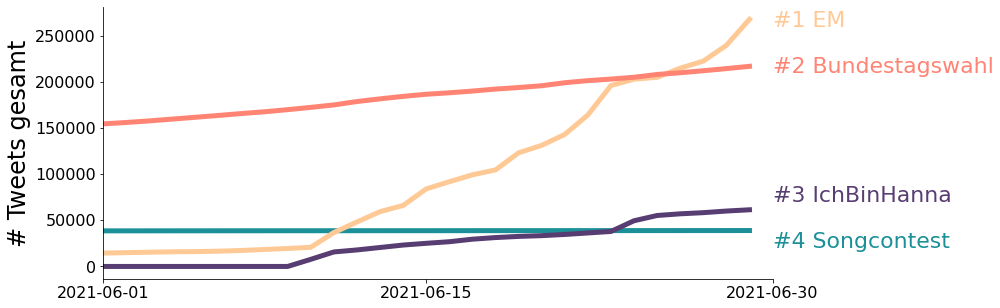

In [95]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(ESC['start'], ESC['day_count_cumsum'],
        label='ESC 2021', color=colors[0], lw=5)
ax.plot(euro['start'], euro['day_count_cumsum'],
        label='euro 2020', color=colors[2], lw=5)
ax.plot(btw['start'], btw['day_count_cumsum'],
        label='euro 2020', color=colors[-3], lw=5)
ax.plot(hanna['start'], hanna['day_count_cumsum'],
        label='IchBinHanna', color=colors[-1], lw=5)

ax.set_xlim(pd.to_datetime('2021-05-01'), pd.to_datetime('2021-06-27'))
ax.set_ylabel('# Tweets gesamt', fontsize=24)
#ax.set_yticks(range(0, 16001, 4000))
dateticks = ['2021-05-01', '2021-05-15', '2021-06-01', '2021-06-15', '2021-06-30']
ax.set_xticks([pd.to_datetime(tick) for tick in dateticks])
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(pd.to_datetime('2021-06-30'), 260000, '#1 EM', fontsize=22, color=colors[2])
ax.text(pd.to_datetime('2021-06-30'), 210000, '#2 Bundestagswahl', fontsize=22, color=colors[-3])
ax.text(pd.to_datetime('2021-06-30'), 70000, '#3 IchBinHanna', fontsize=22, color=colors[-1])
ax.text(pd.to_datetime('2021-06-30'), 20000, '#4 Songcontest', fontsize=22, color=colors[0])



ax.set_xlim(pd.to_datetime('2021-06-01'), pd.to_datetime('2021-06-30'))
plt.savefig(join(dst,'frequency_comparison_to_other_events_cumsum.pdf'))
plt.savefig(join(dst,'frequency_comparison_to_other_events_cumsum.svg'))
plt.savefig(join(dst,'frequency_comparison_to_other_events_cumsum.png'), dpi=300)

In [111]:
sums = [
    euro.iloc[-1]['day_count_cumsum'],
    btw.iloc[-1]['day_count_cumsum'],
    hanna.iloc[-1]['day_count_cumsum'],
    ESC.iloc[-1]['day_count_cumsum'],
       ]
sums.reverse()

bar_colors = ['#ffc996', '#ff8474', '#583d72', '#1c9099']
bar_colors.reverse()

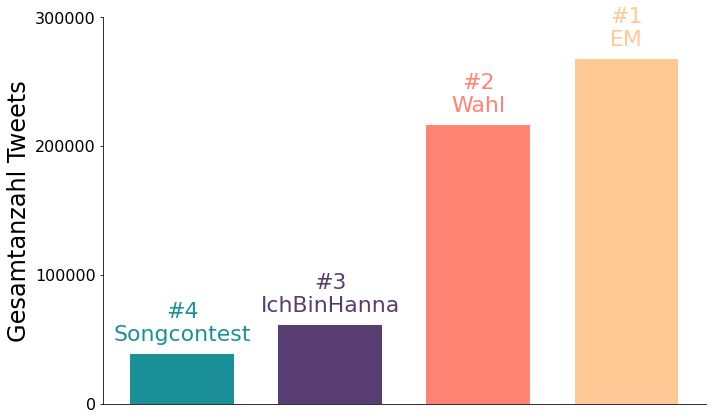

In [156]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(0, 4), sums, color=bar_colors, width=0.7)
ax.set_xticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 300000)
ax.set_yticks(range(0, 300001, 100000))
ax.tick_params(axis='y', labelsize=16)

ydiff = 10000
ax.text(3, sums[3] + ydiff, '#1\nEM', fontsize=22, color=colors[2], ha='center')
ax.text(2, sums[2] + ydiff, '#2\nWahl', fontsize=22, color=colors[-3], ha='center')
ax.text(1, sums[1] + ydiff, '#3\nIchBinHanna', fontsize=22, color=colors[-1], ha='center')
ax.text(0, sums[0] + ydiff, '#4\nSongcontest', fontsize=22, color=colors[0], ha='center')

ax.set_ylabel('Gesamtanzahl Tweets', fontsize=24)

fig.tight_layout()

plt.savefig(join(dst,'frequency_comparison_to_other_events_sum.pdf'))
plt.savefig(join(dst,'frequency_comparison_to_other_events_sum.svg'))
plt.savefig(join(dst,'frequency_comparison_to_other_events_sum.png'), dpi=300)